__Solving system of linear algebraic equations (SLAE)__

# Gaussian elimination

Input matrices have _n x n+1_ size, where _n+1_ column is the column of free members:
$$\begin{pmatrix}
a_{11} & ... & a_{1n} & b_1\\
... & ... & ... & ...\\ 
a_{1n} & ... & a_{nn} & b_n
\end{pmatrix}
$$

__Time complexity__:  $O(n^3)$

__Space complexity__: $O(n)$ - _pivot_ (actually could be without it, but will be a little bit slower)

__Error__: _numerical_


>Algorithm doesn't consider all nuances, _e.g._ free members

In [2]:
def gaussian_elim(m: list[list[float]]) -> list[float]:
    """
    Gaussian elimination method
        m:      list[list[float]], system of linear algebraic equations

        return: list[float], vector of sulutions
    """
    n = len(m)
    col = 0
    # forward elimination 
    for y in range(n):
        if m[y][y] == 0:
            return "Diveded by zero"
        j = y 
        while j < n and m[j][col] == 0:
            j += 1
        if j < n:
            m[j], m[y] = m[y], m[j]

            pivot = [-v / m[y][col] for v in m[y]]
            
            for i in range(y + 1, n):
                if m[i][col] == 0: # if it is already zero no sense to zero it again
                    continue
                temp = m[i][col]
                for k in range(col, n + 1):
                    m[i][k] += temp * pivot[k]
        col += 1

    # bacward substitution
    x = [0] * n
    x[-1] = m[-1][-1] / m[-1][-2]

    for i in range(n - 2, -1, -1):
        x[i] = m[i][-1]

        for j in range(i + 1, n):
            x[i] -= m[i][j] * x[j]
        
        x[i] /= m[i][i]

    return x

In [3]:
import random
import numpy as np


def test(n=100, a=-10, b=10, sizes=[2,6]):
    """
    Generates positive definite symmetrical matrices
        n:      int, number of matrices

        a:      int, left corner of range of definition

        b:      int, right corner of range of definition

        sizes:  [int, int], range of sizes of matrices, 

        return: 
    
    """
    ret = []
    for _ in range(n):
        h = random.randint(*sizes)
        m = np.random.randint(-10, 10, size=[h, h])
        m = np.transpose(np.triu(m, 0)) + np.triu(m, 1)
        m = [list(x) + [random.randint(1, 10)] for x in m]
        ret.append(m)

    return ret
 

# choosed random generated data on which Jacoby method converges
tdata = [
    [[19, -4, -9, -1, 100], [-2, 20, -2, -7, -5], [6, -5, -25, 9, 34], [0, -3, -9, 12, 69]],
    [[-10, -5, 1], [-5, -7, 7]],
    [[-4, 5, 3], [5, 8, 5]],
    [[6, 1, 7], [1, -10, 6]],
    [[9, 3, 1], [3, 5, 4]],
    [[-7, -2, -5, 4], [-2, -7, 2, 7], [-5, 2, 4, 6]],
    [[4, 3, 3, 2], [3, 9, 0, 7], [3, 0, -8, 7]],
    [[6, -6, -1, 6], [-6, 7, 2, 2], [-1, 2, -4, 4]],
    [[-7, -4, 2, 6, -1, 1], [-4, -9, -4, 1, 3, 6], [2, -4, 9, -8, -6, 4], [6, 1, -8, 9, 4, 10], [-1, 3, -6, 4, 7, 2]],
    [[5, 3, 1, 1, -7, 6], [3, -8, -1, 5, -10, 1], [1, -1, -4, -4, 3, 1], [1, 5, -4, 8, 4, 3], [-7, -10, 3, 4, -9, 5]],
]

from copy import deepcopy

for y in tdata:
    y = deepcopy(y)
    print(*y, sep='\n')
    print(gaussian_elim(y))
    print()

[19, -4, -9, -1, 100]
[-2, 20, -2, -7, -5]
[6, -5, -25, 9, 34]
[0, -3, -9, 12, 69]
[8.0, 4.000000000000001, 2.9999999999999996, 9.0]

[-10, -5, 1]
[-5, -7, 7]
[0.6222222222222222, -1.4444444444444444]

[-4, 5, 3]
[5, 8, 5]
[0.01754385964912286, 0.6140350877192983]

[6, 1, 7]
[1, -10, 6]
[1.2459016393442623, -0.47540983606557374]

[9, 3, 1]
[3, 5, 4]
[-0.19444444444444445, 0.9166666666666666]

[-7, -2, -5, 4]
[-2, -7, 2, 7]
[-5, 2, 4, 6]
[-0.8888888888888891, -0.5555555555555556, 0.6666666666666667]

[4, 3, 3, 2]
[3, 9, 0, 7]
[3, 0, -8, 7]
[0.5555555555555556, 0.5925925925925926, -0.6666666666666666]

[6, -6, -1, 6]
[-6, 7, 2, 2]
[-1, 2, -4, 4]
[8.516129032258064, 7.419354838709678, 0.5806451612903225]

[-7, -4, 2, 6, -1, 1]
[-4, -9, -4, 1, 3, 6]
[2, -4, 9, -8, -6, 4]
[6, 1, -8, 9, 4, 10]
[-1, 3, -6, 4, 7, 2]
[1.4518480370795868, -1.274769242958444, 1.5423681812779784, 0.8127005506477044, 1.897080378718853]

[5, 3, 1, 1, -7, 6]
[3, -8, -1, 5, -10, 1]
[1, -1, -4, -4, 3, 1]
[1, 5, -4, 8, 

# Iterative methods

## Jacobi method (simple iterations method)

1. Normalize by diagonal element in the row
2. $ x_{i}^{(k+1)} = \frac{1}{a_{ij}}(b_i - \sum_{j \neq i}{ a_{ij} x_{j}^{(k)} }), \quad i \in [1, n] $



In [10]:
def siter(m: list[list[float]], err=0.001) -> tuple[list[float], int]:
    """
    Simple iterations method
        m:   list[list[float]], system of linear algebraic equations
        
        err: float, difference between current and next iterations

        return: tuple[list[float], int], vector of solution and number of iterations till 0.001 difference

    """
    n = len(m)
    
    for i in range(n):
        div = m[i][i]
        if div == 0:
            return "Division by zero"
        for j in range(n + 1):
            m[i][j] /= div

    # 0 iteration
    x = [m[i][-1] for i in range(n)]
    k = 1
    
    for _ in range(50):
        x_prev = x[0]
        y = []
        for i in range(n):
            y.append(m[i][-1] - sum(v * x0 for v, x0 in zip(m[i][ : i] + m[i][i + 1 : -1], x[ : i] + x[i + 1 : ])))
        k += 1
        x = y
        if abs(x[0] - x_prev) < err:
            break

    return x, k

In [11]:
from copy import deepcopy

for y in tdata:
    y = deepcopy(y)
    print(*y, sep='\n')
    print(siter(y))
    print()

[19, -4, -9, -1, 100]
[-2, 20, -2, -7, -5]
[6, -5, -25, 9, 34]
[0, -3, -9, 12, 69]
([7.999618071296186, 4.0001695914678415, 3.0003750937908924, 8.99938254194244], 26)

[-10, -5, 1]
[-5, -7, 7]
([0.6180257853870411, -1.4418620217766407], 11)

[-4, 5, 3]
[5, 8, 5]
([0.019146566009683896, 0.6140121919141474], 51)

[6, 1, 7]
[1, -10, 6]
([1.2458796296296297, -0.47544444444444445], 5)

[9, 3, 1]
[3, 5, 4]
([-0.192, 0.9157333333333334], 7)

[-7, -2, -5, 4]
[-2, -7, 2, 7]
[-5, 2, 4, 6]
([-0.6010509357641676, -0.5664671800582467, -0.08534034219038866], 51)

[4, 3, 3, 2]
[3, 9, 0, 7]
[3, 0, -8, 7]
([0.5555013020833333, 0.5927734375, -0.6668701171875], 5)

[6, -6, -1, 6]
[-6, 7, 2, 2]
[-1, 2, -4, 4]
([8.44319501148274, 7.355441154709187, 0.5655770773289732], 51)

[-7, -4, 2, 6, -1, 1]
[-4, -9, -4, 1, 3, 6]
[2, -4, 9, -8, -6, 4]
[6, 1, -8, 9, 4, 10]
[-1, 3, -6, 4, 7, 2]
([1.4418803799528135, -1.3127203663973637, 1.542896293354711, 0.8236152709316078, 1.9016739791773785], 51)

[5, 3, 1, 1, -7, 6]


## Siedel's method

1. Normalize by diagonal element in the row
2. $ x_{i}^{(k+1)} = \frac{1}{a_{ij}}(b_i - \sum_{j=1}^{i-1}{ a_{ij} x_{j}^{(k+1)} } - \sum_{j=i+1}^{n}{ a_{ij} x_{j}^{(k)} }), \quad i \in [1, n] $

In [6]:
def siedel(m: list[list[float]], err=0.001) -> list[float]:
    """
    Siedel's method
        m:   list[list[float]], system of linear algebraic equations
        
        err: float, difference between current and next iterations

        return: tuple[list[float], int], vector of solution and number of iterations till 0.001 difference
    """
    n = len(m)
    iters = 50
    
    for i in range(n):
        div = m[i][i]
        if div == 0:
            return "Division by zero"
        for j in range(n + 1):
            m[i][j] /= div

    # 0 iteration
    x = [m[i][-1] for i in range(n)]
    k = 1
    for _ in range(iters):
        x_prev = x[0]
        for i in range(n):
            x[i] = m[i][-1] - sum(v * x0 for v, x0 in zip(m[i][ : i] + m[i][i + 1 : -1], x[ : i] + x[i + 1 : ]))
        k += 1
            
        if abs(x[0] - x_prev) < err:
            break

    return x, k

In [7]:
from copy import deepcopy

for y in tdata:
    y = deepcopy(y)
    print(*y, sep='\n')
    print(siedel(y))
    print() 

[19, -4, -9, -1, 100]
[-2, 20, -2, -7, -5]
[6, -5, -25, 9, 34]
[0, -3, -9, 12, 69]
([7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], 13)

[-10, -5, 1]
[-5, -7, 7]
([0.6217610753172573, -1.444115053798041], 8)

[-4, 5, 3]
[5, 8, 5]
([0.017976349180493845, 0.6137647817621914], 16)

[6, 1, 7]
[1, -10, 6]
([1.2459074074074075, -0.47540925925925925], 4)

[9, 3, 1]
[3, 5, 4]
([-0.19438222222222223, 0.9166293333333334], 6)

[-7, -2, -5, 4]
[-2, -7, 2, 7]
[-5, 2, 4, 6]
([-0.8536607762587625, -0.5830211732911201, 0.7244346163221069], 51)

[4, 3, 3, 2]
[3, 9, 0, 7]
[3, 0, -8, 7]
([0.555572509765625, 0.5925869411892362, -0.6666603088378906], 4)

[6, -6, -1, 6]
[-6, 7, 2, 2]
[-1, 2, -4, 4]
([8.5118656890278, 7.415924108694838, 0.5799956320904691], 42)

[-7, -4, 2, 6, -1, 1]
[-4, -9, -4, 1, 3, 6]
[2, -4, 9, -8, -6, 4]
[6, 1, -8, 9, 4, 10]
[-1, 3, -6, 4, 7, 2]
([1.4514286923752047, -1.2741368994719147, 1.5408000393363612, 0.8131352557540867, 1.895156943398967], 10)

[5

## Ralaxation method

1. Normalize by diagonal element in the row
2. $ x_{i}^{(k+1)} = (1-\omega)x_i^{(k)} + \frac{\omega}{a_{ij}}(b_i - \sum_{j=1}^{i-1}{ a_{ij} x_{j}^{(k+1)} } - \sum_{j=i+1}^{n}{ a_{ij} x_{j}^{(k)} }), \quad i \in [1, n],\quad \omega > 0 $

In [8]:
def relaxation(m: list[list[float]], err=0.001, wrange=20) -> tuple[list[float], list[int]]:
    """
    Simple iterations method
        m:      list[list[float]], system of linear algebraic equations
        
        err:    float, difference between current and next iterations

        wrange: int, range of variation of w

        return: tuple[list[float], int], vector of solution and number of iterations till 0.001 difference

    """
    n = len(m)
    iters = 150
    
    for i in range(n):
        div = m[i][i]
        if div == 0:
            return "Division by zero"
        for j in range(n + 1):
            m[i][j] /= div

    # 0 iteration
    x = [[m[i][-1] for i in range(n)] for _ in range(wrange + 1)]
    
    iterations = []
    for w in range(1, wrange + 1):
        k = 0
        for _ in range(iters):
            x_prev = x[w - 1][0]
            for i in range(n):
                x[w - 1][i] = (1 - w // 10) * x[w - 1][i] + w // 10 * (m[i][-1] - sum(v * x0 for v, x0 in zip(m[i][ : i] + m[i][i + 1 : -1], x[w - 1][ : i] + x[w - 1][i + 1 : ])))
            
            k += 1
            if abs(x[w - 1][0] - x_prev) < err:
                break
        iterations.append(k)

    return x, iterations

[19, -4, -9, -1, 100]
[-2, 20, -2, -7, -5]
[6, -5, -25, 9, 34]
[0, -3, -9, 12, 69]
[[5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [5.2631578947368425, -0.25, -1.36, 5.75], [7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], [7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], [7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], [7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], [7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], [7.9995290962114485, 3.9996711214127876, 2.999724966278591, 8.999711505062141], [7.9995290962114485, 3.9996711214127876, 2.999724966278591

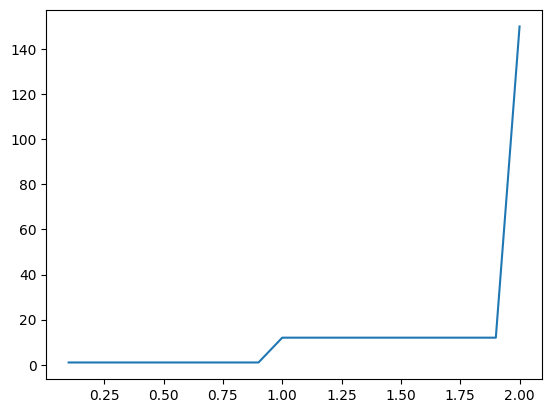


[-10, -5, 1]
[-5, -7, 7]
[[-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [-0.1, -1.0], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [0.6217610753172573, -1.444115053798041], [1.2861504589069064, -2.200299231501945], [-0.1, -1.0]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 150]


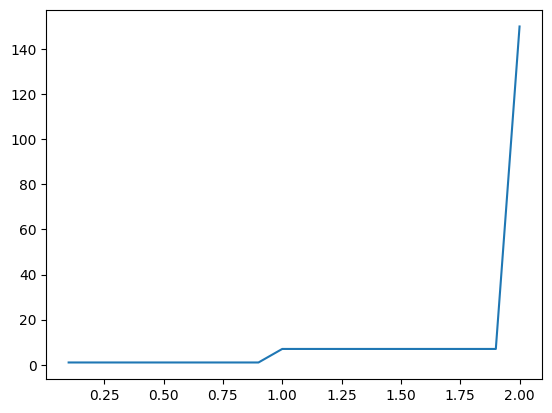


[-4, 5, 3]
[5, 8, 5]
[[-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [-0.75, 0.625], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [0.017976349180493845, 0.6137647817621914], [-8.924661525263349e+102, 1.4000378066610743e+103], [-0.75, 0.625]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 150]


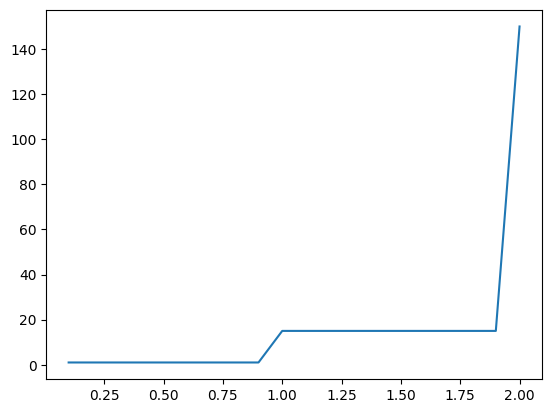


[6, 1, 7]
[1, -10, 6]
[[1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.1666666666666667, -0.6], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [1.2459074074074075, -0.47540925925925925], [-6789613496540431.0, -5981819010742680.0], [1.1666666666666667, -0.6]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 150]


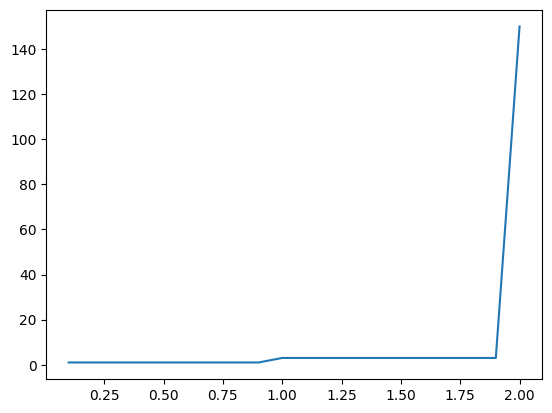


[9, 3, 1]
[3, 5, 4]
[[0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [0.1111111111111111, 0.8], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [-0.19438222222222223, 0.9166293333333334], [0.04619019010333536, 0.5366895160304572], [0.1111111111111111, 0.8]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 150]


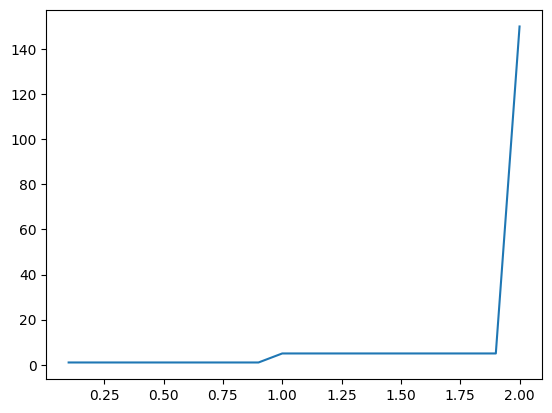


[-7, -2, -5, 4]
[-2, -7, 2, 7]
[-5, 2, 4, 6]
[[-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.5714285714285714, -1.0, 1.5], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [-0.8884257667747633, -0.5559166289711261, 0.6674261060171089], [1.0471

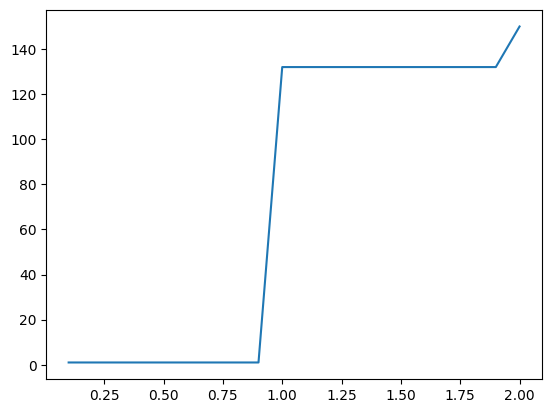


[4, 3, 3, 2]
[3, 9, 0, 7]
[3, 0, -8, 7]
[[0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.5, 0.7777777777777778, -0.875], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [0.555572509765625, 0.5925869411892362, -0.6666603088378906], [-5.844045123024146e+21

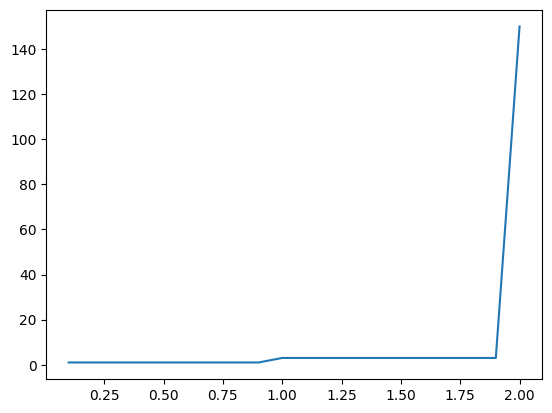


[6, -6, -1, 6]
[-6, 7, 2, 2]
[-1, 2, -4, 4]
[[1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [1.0, 0.2857142857142857, -1.0], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [8.5118656890278, 7.415924108694838, 0.5799956320904691], [3.3474101061481796, 5.417029860579206, 1.4609768124552296], [1.0, 0.28571428

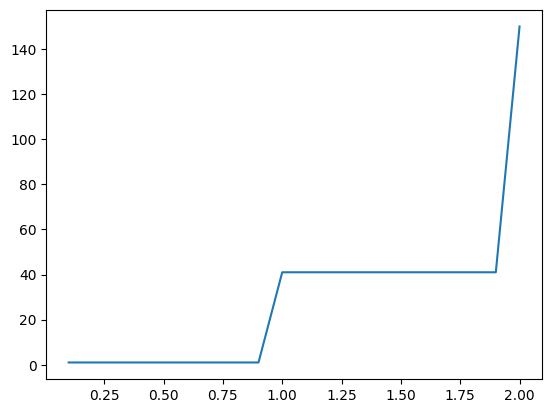


[-7, -4, 2, 6, -1, 1]
[-4, -9, -4, 1, 3, 6]
[2, -4, 9, -8, -6, 4]
[6, 1, -8, 9, 4, 10]
[-1, 3, -6, 4, 7, 2]
[[-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444444444444444, 1.1111111111111112, 0.2857142857142857], [-0.14285714285714285, -0.6666666666666666, 0.4444

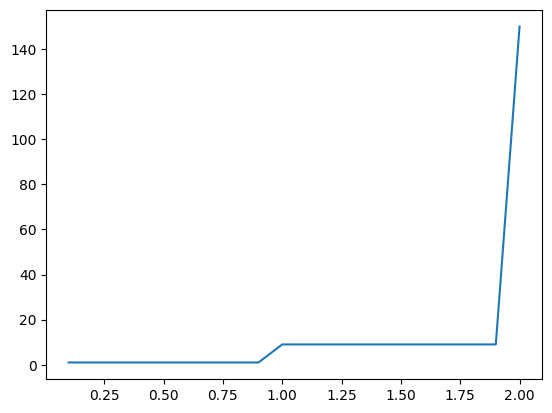


[5, 3, 1, 1, -7, 6]
[3, -8, -1, 5, -10, 1]
[1, -1, -4, -4, 3, 1]
[1, 5, -4, 8, 4, 3]
[-7, -10, 3, 4, -9, 5]
[[1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [1.2, -0.125, -0.25, 0.375, -0.5555555555555556], [-1.555914130109372, 1.3965049761988946, -1.8671121019851145, -0.3906423361749711, -1.6930618335420633], [-1.555914130109372, 1.3965049761988946, -1.8671121019851145, -0.3906423361749711, -1.6930618335420633], [-1.555914130109372, 1.3965049761988946, -1.8671121019851145, -0.3906423361749711, -1.6930618335420633], [-1.555914130109372, 1.3965049761988946, -1.8671121019851145, -0.3906423361749711, -1.6930618335420633], [-1.555914130109372,

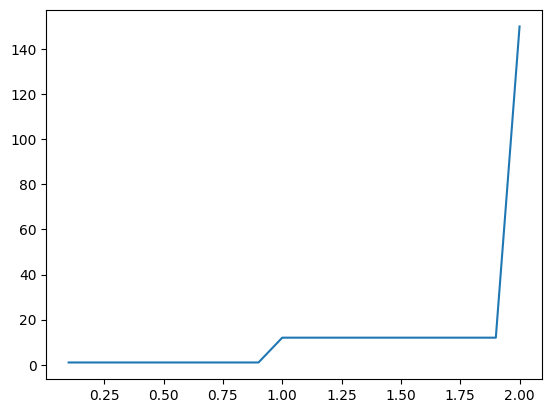

In [12]:
from copy import deepcopy
import matplotlib.pyplot as plt

for y in tdata:
    y = deepcopy(y)
    print(*y, sep='\n')
    x, k = relaxation(y)
    print(x)
    print(k)
    plt.plot([x / 10 for x in range(1, 21)], k)
    plt.show()
    print()